<a href="https://colab.research.google.com/github/agmukesh/Boston-housing-price-analysis/blob/main/Untitled0_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DL_project

/content/drive/MyDrive/DL_project


In [ ]:
!ls


 datasets	 drone1.jpg	 drones-2048px-0698.jpg       sample.jpg
 data.yaml	'drone ca.jpg'	 processed_sample_video.mp4  'Untitled0 (1).ipynb'
 DJI_Mini_.mp4	 drone_dataset	 runs			      yolov8n.pt


In [ ]:
! nvidia-smi

Mon Apr 22 01:07:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Install Ultralytics library
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [ ]:
# Load a pretrained YOLOv8n model from Ultralytics
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.8MB/s]


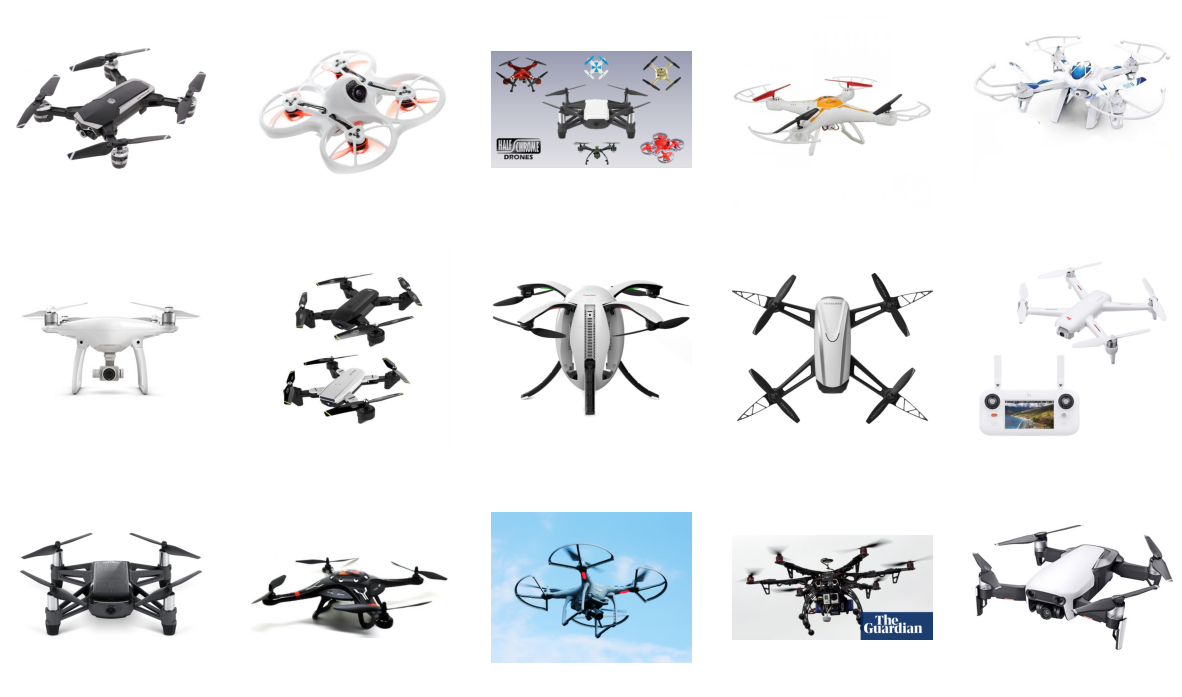

In [ ]:
train_image = '/content/drive/MyDrive/DL_project/drone_dataset/train/images'

# List of image files
train_image_files = os.listdir(train_image)

# Load the first 15 images
train_images = [plt.imread(os.path.join(train_image, file)) for file in train_image_files[:15]]

# Display the images
plt.figure(figsize=(15, 15))
for i in range(15):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i])
    plt.axis("off")
plt.show()

In [ ]:
config = {
    "path": "/content/drive/MyDrive/DL_project/drone_dataset",
    "train": "/content/drive/MyDrive/DL_project/drone_dataset/train",
    "val": "/content/drive/MyDrive/DL_project/drone_dataset/valid",
    "nc": 1,
    "names": ["drone"],
}

with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [ ]:
!ls


 data.yaml   drone_dataset   sample.jpg  'Untitled0 (1).ipynb'	 yolov8n.pt


In [ ]:
import random

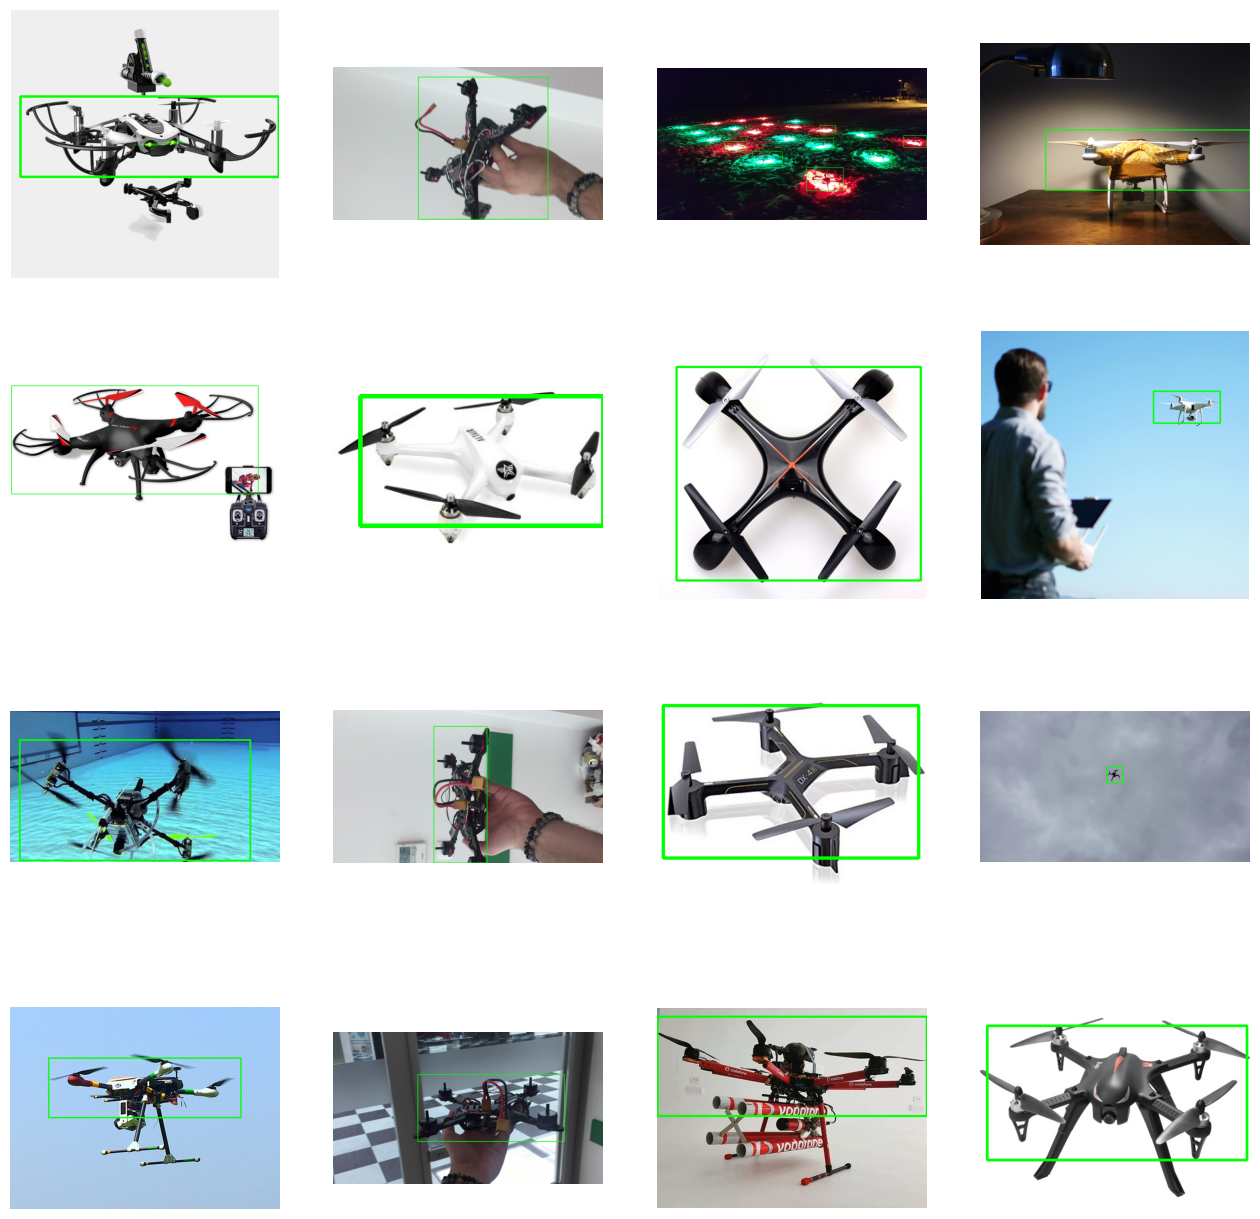

In [ ]:
train_images = "/content/drive/MyDrive/DL_project/drone_dataset/train/images"
train_labels = "/content/drive/MyDrive/DL_project/drone_dataset/train/labels"
valid_images ='/content/drive/MyDrive/DL_project/drone_dataset/valid/images'

image_files = os.listdir(train_images)
random_images = random.sample(image_files, 16)
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [ ]:
# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 1012
Number of validation images: 347
Training images have varying sizes.
Validation images have varying sizes.


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs= 50 imgsz=640   batch=8 optimizer=auto


Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

In [ ]:
!ls /content/drive/MyDrive/DL_project/runs/detect/train2


args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1713748174.34742d5ffdd7.3737.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5080.jpg  weights
P_curve.png					    train_batch5081.jpg
PR_curve.png					    train_batch5082.jpg


In [ ]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

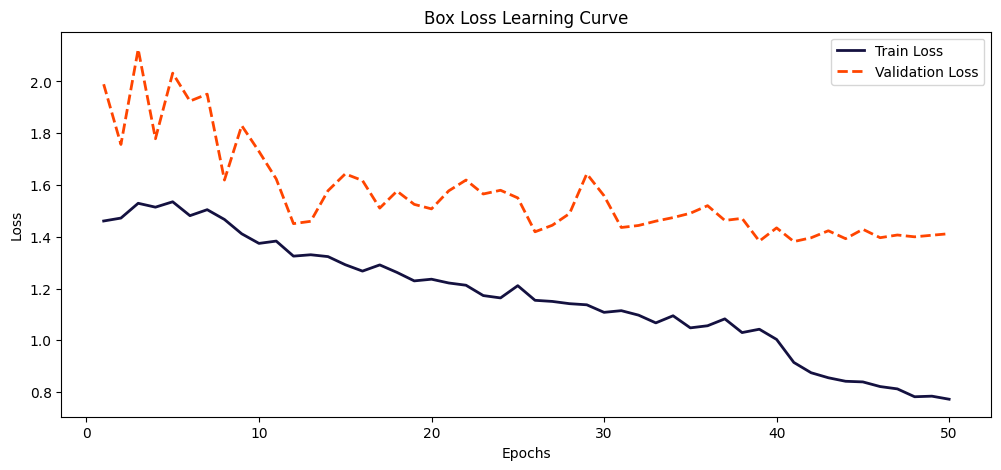

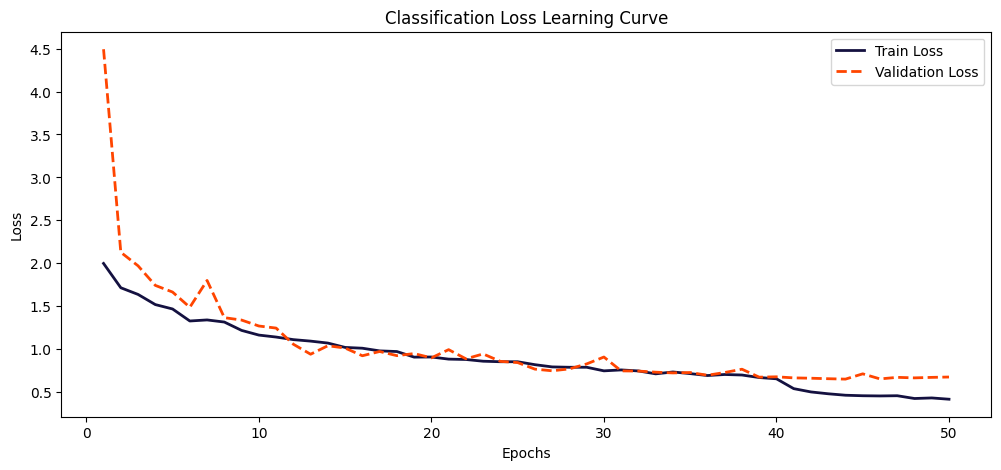

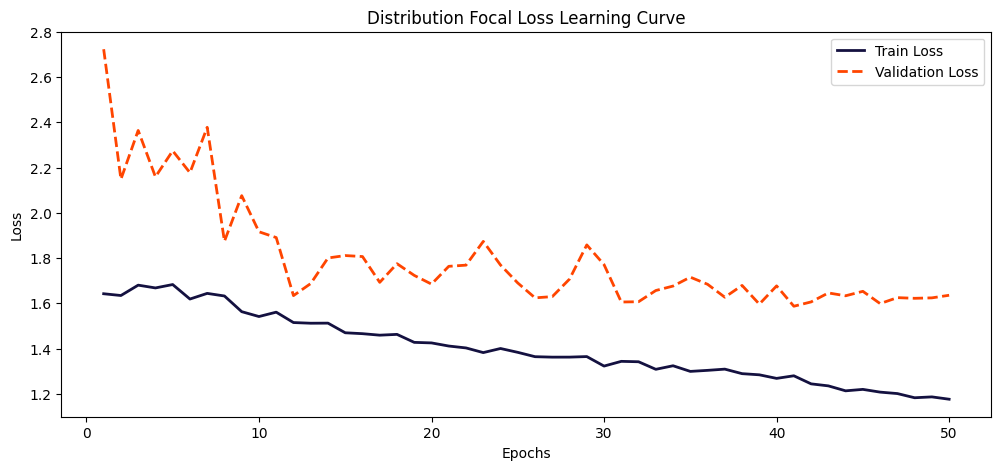

In [ ]:
# Define the path to the directory
post_training_files_path = '/content/drive/MyDrive/DL_project/runs/detect/train2'

# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

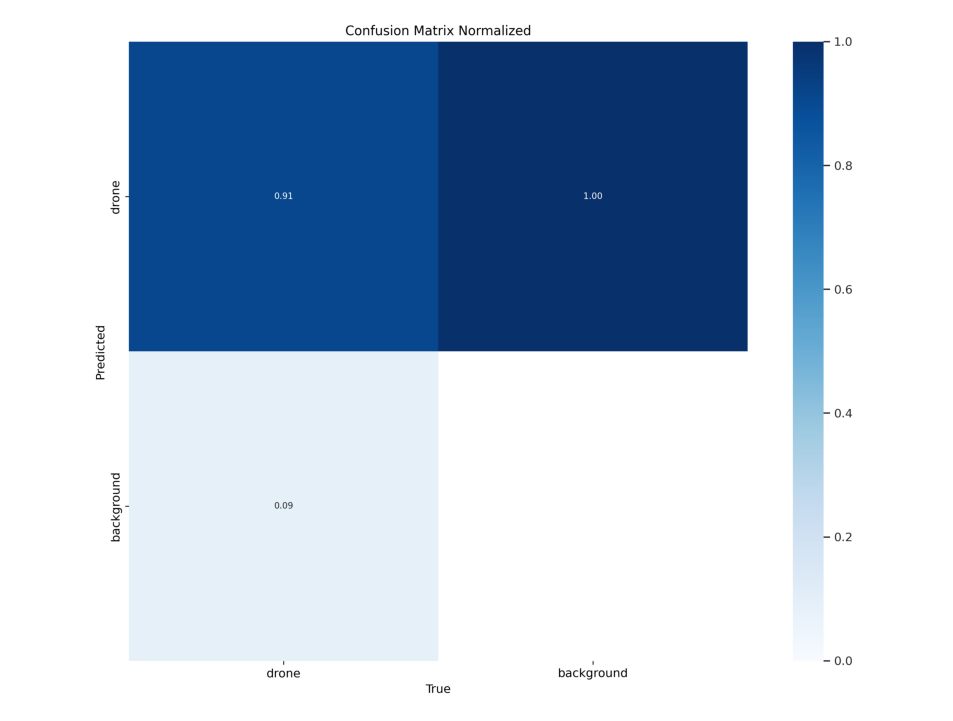

In [ ]:
# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

In [ ]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DL_project/drone_dataset/valid/labels... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [00:03<00:00, 102.59it/s]


val: New cache created: /content/drive/MyDrive/DL_project/drone_dataset/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:14<00:00,  1.56it/s]


                   all        347        369      0.928      0.869      0.932      0.577
Speed: 0.9ms preprocess, 7.1ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

Metric Value
metrics/precision(B)         0.928
metrics/recall(B)            0.869
metrics/mAP50(B)             0.932
metrics/mAP50-95(B)          0.577
fitness                      0.613


image 1/1 /content/drive/MyDrive/DL_project/drone_dataset/valid/images/0011.jpg: 480x640 2 drones, 9.4ms
Speed: 2.6ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/DL_project/drone_dataset/valid/images/0054.jpg: 640x640 1 drone, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DL_project/drone_dataset/valid/images/0218.jpg: 448x640 1 drone, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/DL_project/drone_dataset/valid/images/0248.jpg: 448x640 1 drone, 9.1ms
Speed: 3.2ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/DL_project/drone_dataset/valid/images/0265.jpg: 224x640 1 drone, 9.8ms
Speed: 1.3ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 22

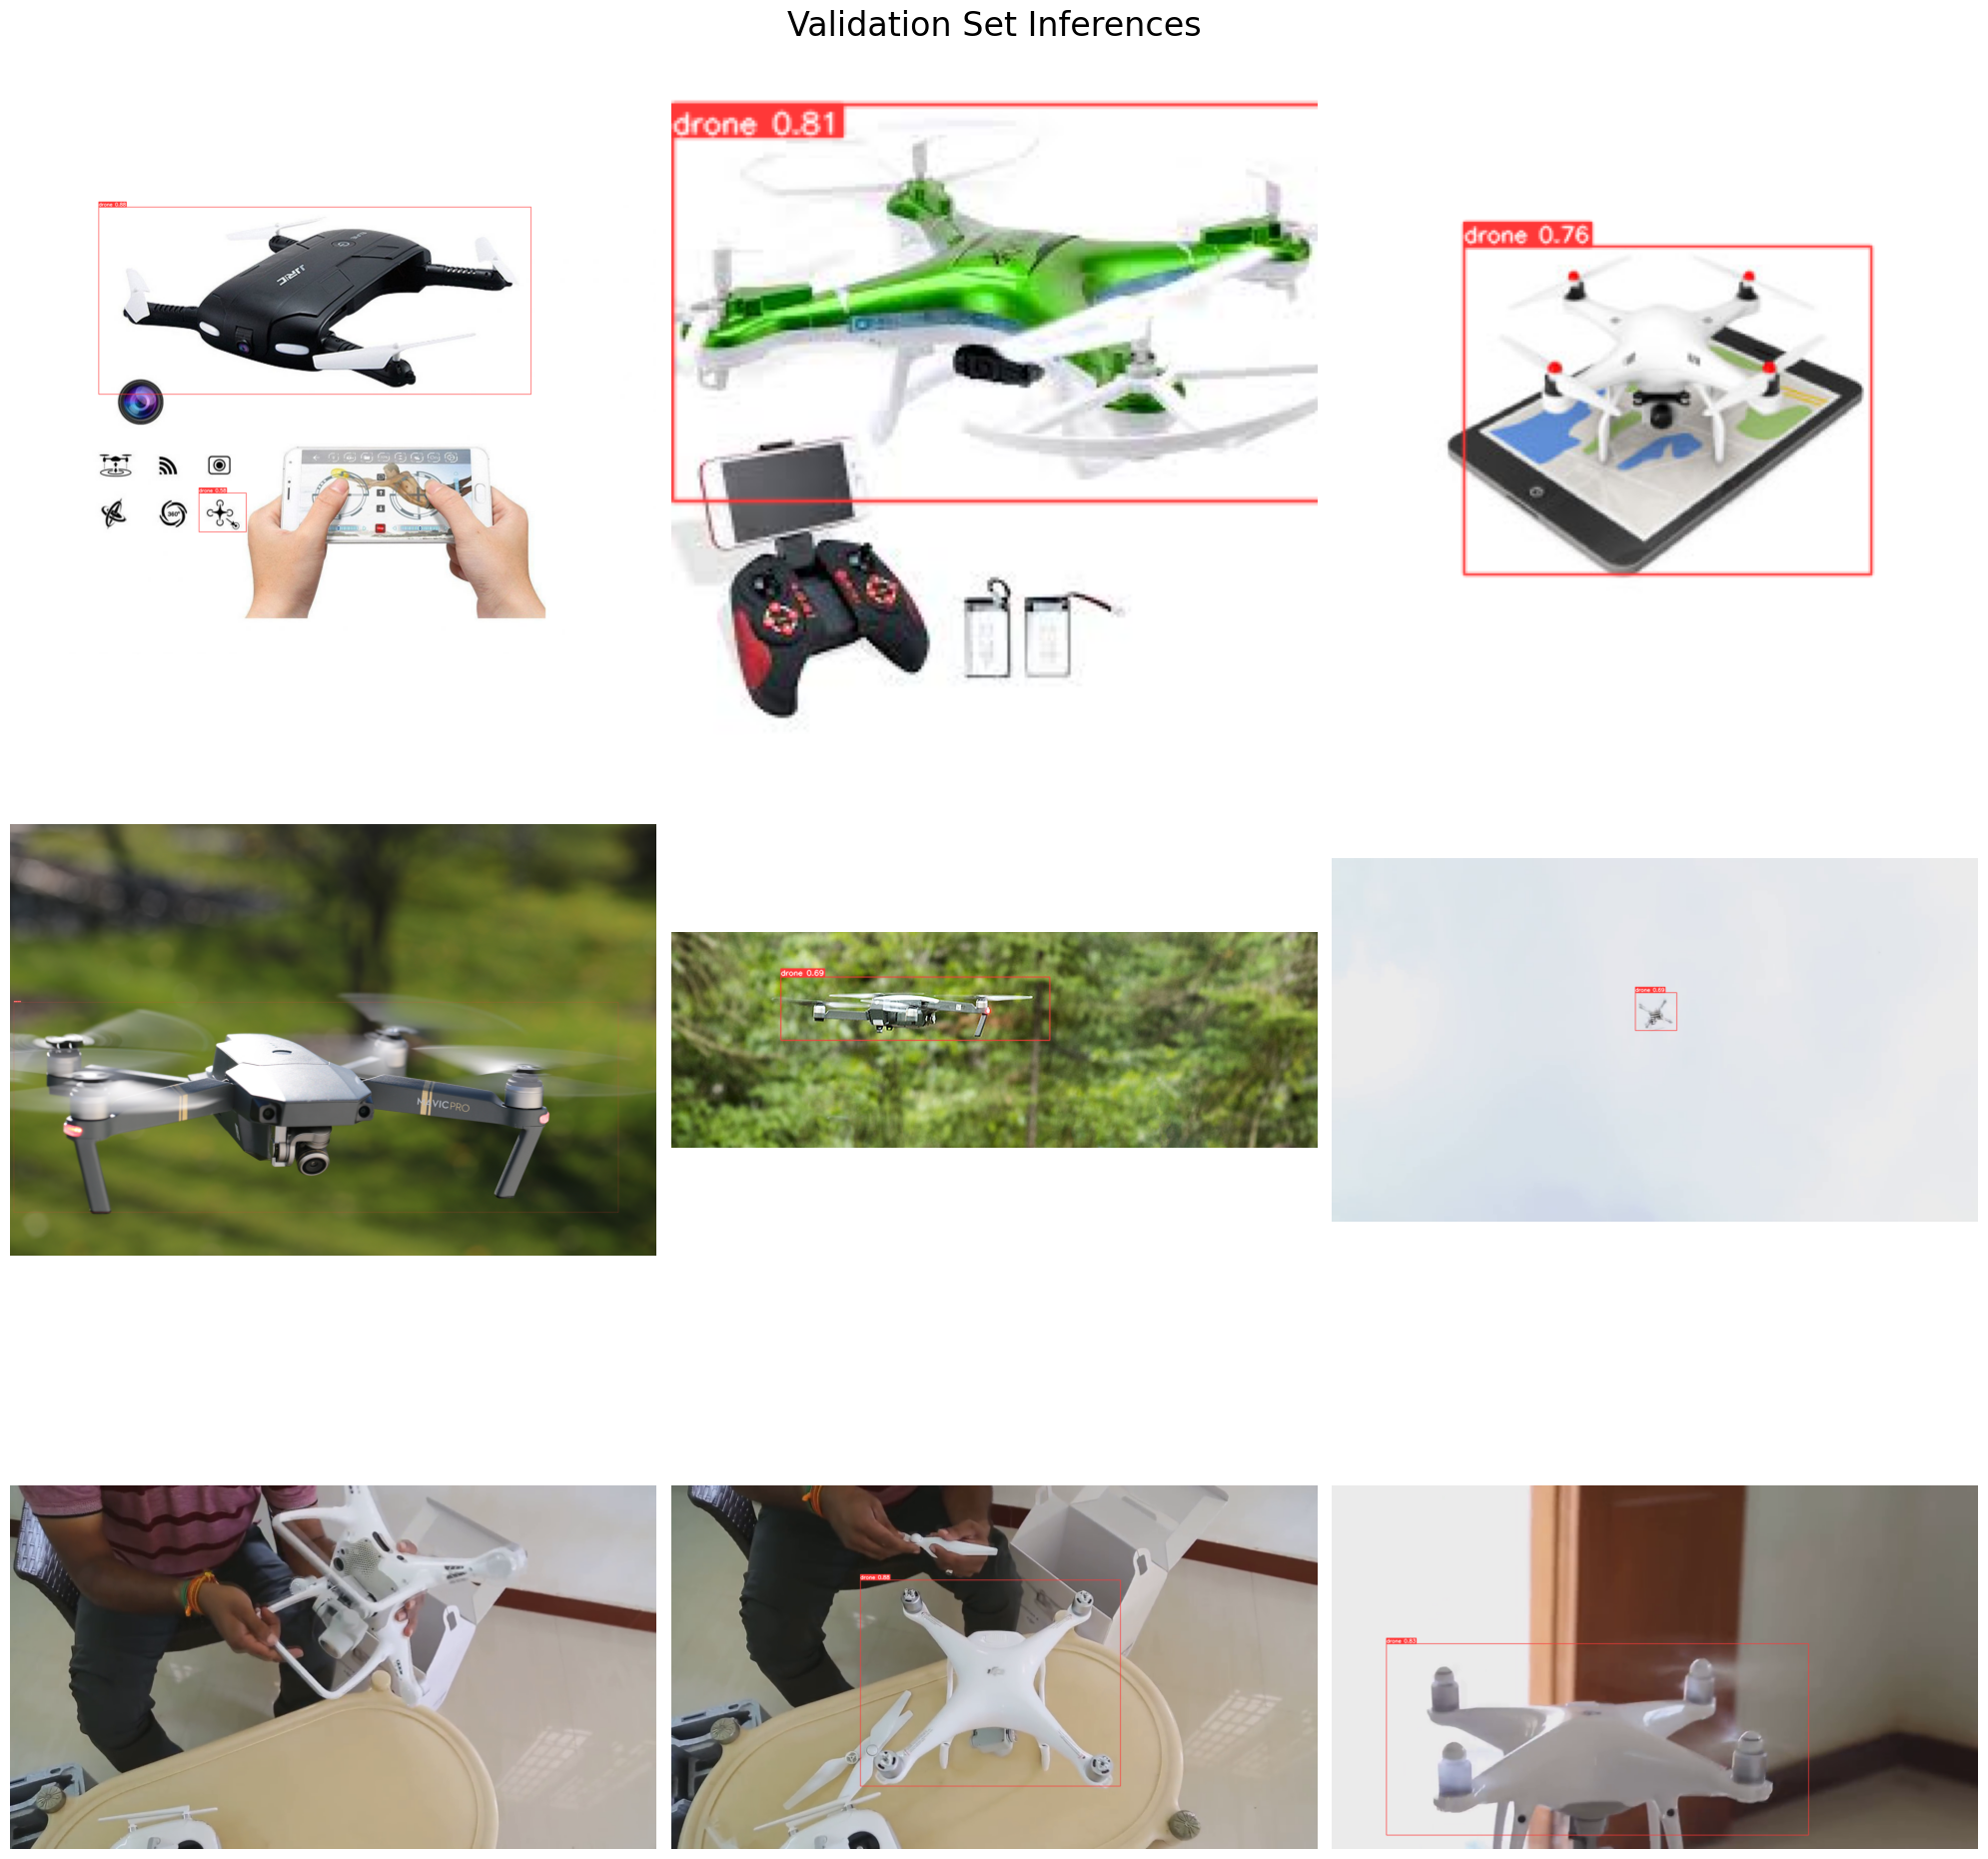

In [ ]:
dataset_path='/content/drive/MyDrive/DL_project/drone_dataset'
# Define the path to the validation images
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# List all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Select 9 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 10)]

# Initialize the subplot
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640, conf=0.5)
    annotated_image = results[0].plot(line_width=1)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Path to the image file
sample_image_path = '/content/drive/MyDrive/DL_project/sample_image.jpg'

# Perform inference on the provided image using best model
results = best_model.predict(source=sample_image_path, imgsz=640, conf=0.7)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Fine-tuned YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()

NameError: name 'best_model' is not defined


image 1/1 /content/drive/MyDrive/DL_project/drone ca.jpg: 384x640 1 drone, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


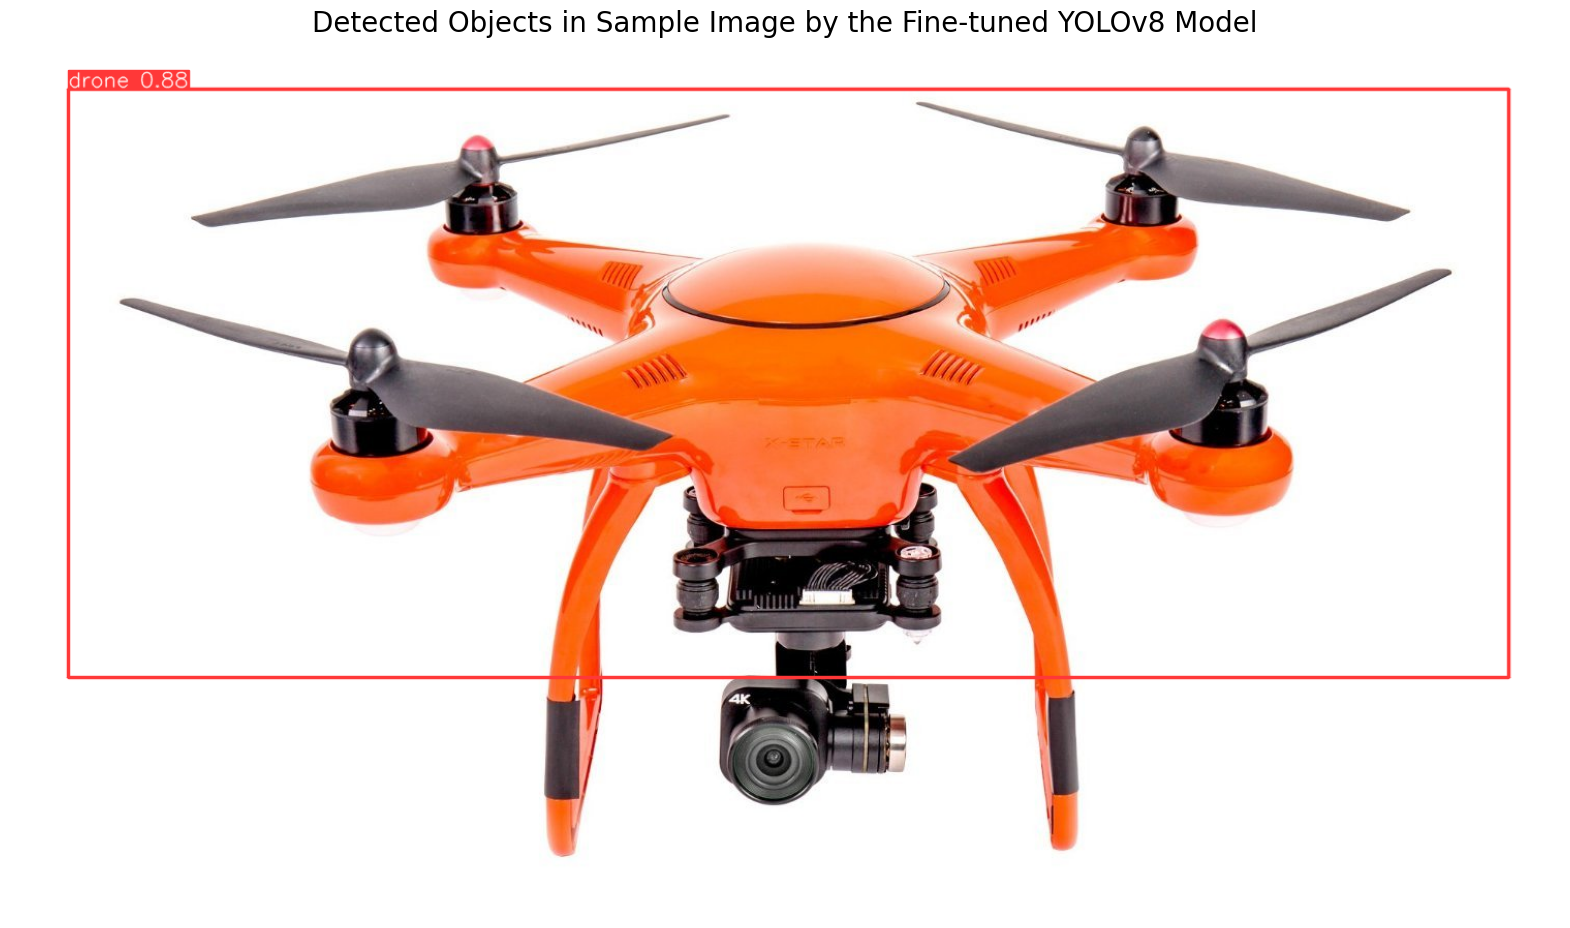

In [ ]:
# Path to the image file
sample_image_path = '/content/drive/MyDrive/DL_project/drone ca.jpg'

# Perform inference on the provided image using best model
results = best_model.predict(source=sample_image_path, imgsz=640, conf=0.7)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Fine-tuned YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
# Define the path to the sample video in the dataset
video_path = '/content/drive/MyDrive/DL_project/DJI_Mini_.mp4'



# Initiate vehicle detection on the sample video using the best performing model and save the output
best_model.predict(source=video_path, save=True)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1441) /content/drive/MyDrive/DL_project/DJI_Mini_.mp4: 640x384 1 drone, 9.7ms
video 1/1 (frame 2/1441) /content/drive/MyDrive/DL_project/DJI_Mini_.mp4: 640x384 1 drone, 11.3ms
video 1/1 (frame 3/1441) /content/drive/MyDrive/DL_project/DJI_Mini_.mp4: 640x384 1 drone, 9.6ms
video 1/1 (frame 4/1441) /content/drive/MyDrive/DL_project/DJI_Mini_.mp4: 640x384 1 drone, 9.5ms
video 1/1 (frame 5/1441) /content/drive/MyDrive/DL_project/DJI_Mini

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'drone'}
 obb: None
 orig_img: array([[[185, 195, 212],
         [191, 201, 218],
         [191, 201, 218],
         ...,
         [155, 170, 181],
         [159, 174, 185],
         [161, 176, 187]],
 
        [[184, 194, 211],
         [180, 190, 207],
         [178, 188, 205],
         ...,
         [148, 163, 174],
         [150, 165, 176],
         [151, 166, 177]],
 
        [[158, 168, 185],
         [153, 163, 180],
         [153, 163, 180],
         ...,
         [133, 148, 159],
         [133, 148, 159],
         [133, 148, 159]],
 
        ...,
 
        [[136, 148, 158],
         [139, 151, 161],
         [146, 158, 168],
         ...,
         [147, 154, 165],
         [142, 149, 160],
         [136, 143, 154]],
 
        [[157, 169, 179],
         [155, 167, 177],
         [152, 164, 174],
         ...,
         [165, 172,

In [ ]:
# Convert the .avi video generated by the YOLOv8 prediction to .mp4 format for compatibility with notebook display
!ffmpeg -i /content/drive/MyDrive/DL_project/runs/detect/predict/DJI_Mini_.avi -c:v libx264 -crf 23 -c:a aac -b:a 128k processed_sample_video.mp4



ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# Embed and display the processed sample video within the notebook
from IPython.display import Video

video_path = "/content/drive/MyDrive/DL_project/processed_sample_video.mp4"
Video(video_path, embed=True, width=960)